### сначала объединим файлики в один большой

In [1]:
loss_functions = ['LINE','APP','VERSEAdj','lapeigen','VERSEPPR','VERSESR','DeepWalk','Node2Vec','HOPEKatz','HOPERPR','HOPECN','HOPE_AA','GF','Force2Vec']
len(loss_functions)

14

In [29]:
import pandas as pd
import os
import re

rootdir = "../data_results/"
regex = re.compile('results_on_LP_random_split_(VERSEPPR|VERSEAdj|VERSESR|DeepWalk|Node2Vec|APP|HOPEKatz|HOPERPR|HOPECN|HOPE_AA|lapeigen|LINE|GF|Force2Vec)')

for root, dirs, files in os.walk(rootdir):
    for file in files:
     # print(file)
        if regex.match(file):


results_on_LP_random_split_APP.csv 207
results_on_LP_random_split_APP_roc_auc_vers.csv 207
results_on_LP_random_split_DeepWalk.csv 206
results_on_LP_random_split_Force2Vec.csv 207
results_on_LP_random_split_Force2Vec_roc_auc_vers.csv 207
results_on_LP_random_split_GF(1).csv 226
results_on_LP_random_split_GF.csv 207
results_on_LP_random_split_HOPECN.csv 207
results_on_LP_random_split_HOPECN_roc_auc_vers.csv 207
results_on_LP_random_split_HOPEKatz.csv 207
results_on_LP_random_split_HOPEKatz_roc_auc_vers.csv 207
results_on_LP_random_split_HOPERPR.csv 207
results_on_LP_random_split_HOPERPR_roc_auc_vers.csv 207
results_on_LP_random_split_HOPE_AA.csv 207
results_on_LP_random_split_HOPE_AA_roc_auc_vers.csv 207
results_on_LP_random_split_lapeigen.csv 207
results_on_LP_random_split_lapeigen_roc_auc_vers.csv 207
results_on_LP_random_split_LINE.csv 207
results_on_LP_random_split_LINE_roc_auc_vers.csv 207
results_on_LP_random_split_Node2Vec.csv 207
results_on_LP_random_split_VERSEAdj.csv 207
resul

In [2]:
files = ['results_on_LP_random_split_APP_roc_auc_vers.csv','results_on_LP_random_split_DeepWalk.csv','results_on_LP_random_split_Force2Vec_roc_auc_vers.csv','results_on_LP_random_split_GF.csv','results_on_LP_random_split_HOPECN_roc_auc_vers.csv','results_on_LP_random_split_HOPEKatz_roc_auc_vers.csv','results_on_LP_random_split_HOPERPR_roc_auc_vers.csv','results_on_LP_random_split_HOPE_AA_roc_auc_vers.csv','results_on_LP_random_split_lapeigen_roc_auc_vers.csv','results_on_LP_random_split_LINE_roc_auc_vers.csv','results_on_LP_random_split_Node2Vec.csv','results_on_LP_random_split_VERSEAdj_roc_auc_vers.csv','results_on_LP_random_split_VERSEPPR_roc_auc_vers.csv','results_on_LP_random_split_VERSESR.csv']

In [33]:
df = pd.read_csv(rootdir+files[0])
for file in files[1:]:
   df=pd.concat([df,pd.read_csv(rootdir+file)])

# анализ результатов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

df = pd.read_csv('whole_data_results.csv')
#df = df.drop(columns=['dataset','best_values','Unnamed: 0'])

# Ranking

In [29]:
df_GAT = df[df['conv']=='GAT']

In [26]:
new_df = df_GAT.sort_values(['dataset','acc lp'])

In [60]:
i=0
all_best_losses = []
for row in list(collections.Counter(new_df['dataset']).keys()):
    i+=1
    line = new_df[new_df['dataset'] == row]['acc lp'].values
    best_value = line[len(line)-1]
    #print((df_GAT[(df_GAT['dataset']==row) & (df_GAT['acc lp']<=best_value) & (df_GAT['acc lp']>best_value-0.03)]['loss'].values))

    all_best_losses+=(list(df_GAT[(df_GAT['dataset']==row) & (df_GAT['acc lp']<=best_value) & (df_GAT['acc lp']>best_value-0.05)]['loss'].values))
print(all_best_losses)
print(collections.Counter(all_best_losses))
    #print(line)
    #plt.scatter(y = line,x = list(range(len(line))))
    #plt.show()


['DeepWalk', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Node2Vec', 'Force2Vec', 'DeepWalk', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'GraphFactorization', 'HOPE_CN', 'HOPE_Katz', 'HOPE_AA', 'Force2Vec', 'HOPE_CN', 'HOPE_Katz', 'HOPE_RPR', 'Force2Vec', 'GraphFactorization', 'Force2Vec', 'HOPE_CN', 'HOPE_RPR', 'Force2Vec', 'GraphFactorization', 'HOPE_CN', 'HOPE_RPR', 'Force2Vec', 'HOPE_CN', 'HOPE_RPR', 'GraphFactorization', 'HOPE_CN', 'HOPE_Katz', 'HOPE_RPR', 'HOPE_AA', 'Force2Vec', 'GraphFactorization', 'HOPE_CN', 'HOPE_Katz', 'HOPE_RPR', 'HOPE_AA', 'Force2Vec', 'GraphFactorization', 'HOPE_CN', 'HOPE_Katz', 'HOPE_RPR', 'HOPE_AA', 'Force2Vec', 'Force2Vec', 'GraphFactorization', 'HOPE_Katz', 'HOPE_RPR', 'Force2Vec', 'HOPE_CN', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'Force2Vec', 'HOPE_AA', 'LapEigen', 'Force2Vec', 'Force2Vec', 'HOPE_CN', 'Force2Vec', 'GraphFactorization', 'Force2Vec', 'GraphFactorization', 'HOPE_RPR',

In [24]:
loss_functions=list(dict(collections.Counter(df['loss'])).keys())

In [26]:
mapping = {'APP': 'similarity distr.',
 'DeepWalk': 'random walks',
 'Force2Vec':'t-distribution',
 'GraphFactorization':'factorization',
 'HOPE_CN':'factorization',
 'HOPE_Katz':'factorization',
 'HOPE_RPR':'factorization',
 'HOPE_AA':'factorization',
 'LapEigen': 'laplacian eigenmaps',
 'LINE':'similarity distr.',
 'Node2Vec': 'random walks',
 'VERSE_Adj':'similarity distr.',
 'VERSE_PPR':'similarity distr.',
 'VERSE_SimRank':'similarity distr.'}

In [28]:
df['type of loss'] = df['loss'].apply(lambda x: mapping[x])

In [31]:
df_new = df[['type of loss','loss','conv','fa','cl','asp','ad','acc lp']]

In [33]:
df_new.to_csv('whole_data_results_type_losses.csv')

In [18]:
len(df[(df['cl']==0.01) & (df['conv']=='GAT') & (df['loss']=='Force2Vec')])

27

In [19]:
len(df[(df['cl']==0.2) & (df['conv']=='GAT') & (df['loss']=='Force2Vec')])

24

In [20]:
len(df[(df['cl']==0.5) & (df['conv']=='GAT') & (df['loss']=='Force2Vec')])

18

In [20]:
df[(df['acc lp']>0.5) ]['loss'].value_counts()

Force2Vec             207
GraphFactorization    207
HOPE_CN               205
HOPE_Katz             203
HOPE_RPR              203
DeepWalk              202
HOPE_AA               202
Node2Vec              202
VERSE_SimRank         147
VERSE_PPR             125
VERSE_Adj             120
LapEigen              116
adamic-adar            69
LINE                   67
APP                    46
Name: loss, dtype: int64

In [3]:
# нормализуем
df_only_numbers = df[['fa','cl','asp','ad','acc lp']]
normalized_df=(df_only_numbers-df_only_numbers.min())/(df_only_numbers.max()-df_only_numbers.min())
df_strings = df[['loss','conv']]
normalized_df = pd.concat([df_strings,normalized_df],axis = 1)
normalized_df

,loss,conv,fa,cl,asp,ad,acc lp
0,APP,SAGE,0.0,0.000000,0.0,0.078947,0.112820
1,APP,SAGE,0.0,0.000000,0.0,0.473684,0.346956
2,APP,SAGE,0.0,0.000000,0.0,1.000000,0.133161
3,APP,SAGE,0.0,0.000000,0.2,0.000000,0.292324
4,APP,SAGE,0.0,0.000000,0.2,0.078947,0.024170
...,...,...,...,...,...,...,...
2892,VERSE_SimRank,SAGE,1.0,1.000000,0.0,0.473684,0.481465
2893,VERSE_SimRank,SAGE,1.0,1.000000,0.0,1.000000,0.418933
2894,VERSE_SimRank,GCN,0.0,0.000000,0.2,0.000000,0.283557
2895,VERSE_SimRank,GCN,0.0,0.000000,0.2,0.078947,0.501225


In [4]:
df = normalized_df

C:\Users\User\Desktop\Benchmarking-Loss-Functions\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


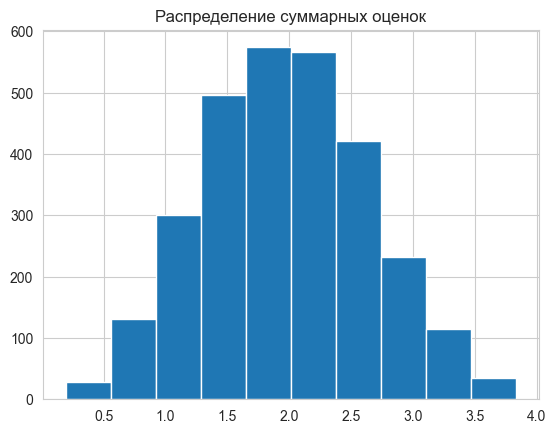

In [5]:
distribution = normalized_df.sum(axis=1)
plt.title('Распределение суммарных оценок')
distribution.hist();

# loss conv barplot

In [12]:
 df_loss_conv[df_loss_conv['loss']=='adamic-adar']['acc lp'].mean()

0.6559609650573325

In [17]:
import matplotlib
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

<Figure size 1000x1000 with 0 Axes>

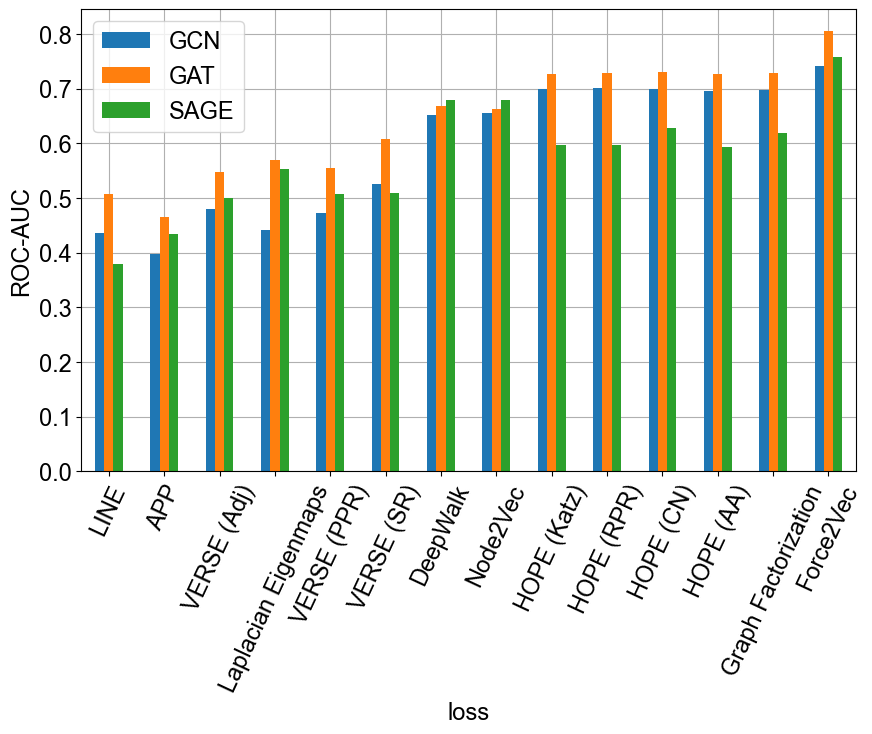

In [46]:
df_loss_conv=df[['loss','conv','acc lp']]
loss_conv_data = df_loss_conv.groupby(['conv','loss']).mean()#.reset_index()
loss_conv_data=loss_conv_data.reset_index() #= loss_conv_data.reset_index(col_level=0)
data = np.zeros((14,4))
new_df = pd.DataFrame(data,columns=['loss','GCN','GAT','SAGE'])

loss_functions = ['LINE','APP','VERSE_Adj','LapEigen','VERSE_PPR','VERSE_SimRank','DeepWalk','Node2Vec','HOPE_Katz','HOPE_RPR','HOPE_CN','HOPE_AA','GraphFactorization','Force2Vec']
new_df['loss'] = loss_functions

GCNs=[]
GATs = []
SAGEs = []

for loss in loss_functions:
    GCNs.append(loss_conv_data[(loss_conv_data['loss']==loss) & (loss_conv_data['conv']=='GCN')]['acc lp'].values[0])
    GATs.append(loss_conv_data[(loss_conv_data['loss']==loss) & (loss_conv_data['conv']=='GAT')]['acc lp'].values[0])
    SAGEs.append(loss_conv_data[(loss_conv_data['loss']==loss) & (loss_conv_data['conv']=='SAGE')]['acc lp'].values[0])

new_df['GCN'] = GCNs
new_df['GAT'] = GATs
new_df['SAGE'] = SAGEs
new_df=new_df.set_index('loss')

loss_xticks = ['LINE','APP','VERSE (Adj)','Laplacian Eigenmaps','VERSE (PPR)','VERSE (SR)','DeepWalk','Node2Vec','HOPE (Katz)','HOPE (RPR)','HOPE (CN)','HOPE (AA)','Graph Factorization','Force2Vec']
plt.figure(figsize=(10, 10))
ax=new_df.plot.bar(figsize=(10,6))
plt.grid(linestyle = "-")
ax.set_xticklabels(loss_xticks, rotation=65)
plt.ylabel('ROC-AUC')
ax.set_axisbelow(True)
plt.show()

# построим bar plot для каждой характеристики

In [4]:
#fa

df_loss_fa=df[['loss','fa','acc lp']]

In [5]:
loss_fa_data = df_loss_fa.groupby(['fa','loss']).mean()#.reset_index()
loss_fa_data=loss_fa_data.reset_index() #= loss_conv_data.reset_index(col_level=0)

In [8]:
loss_fa_data

,fa,loss,acc lp
0,0.1,APP,0.433189
1,0.1,DeepWalk,0.671404
2,0.1,Force2Vec,0.772408
3,0.1,GraphFactorization,0.684882
4,0.1,HOPE_AA,0.675239
5,0.1,HOPE_CN,0.687288
6,0.1,HOPE_Katz,0.676448
7,0.1,HOPE_RPR,0.682945
8,0.1,LINE,0.449849
9,0.1,LapEigen,0.525729


In [7]:
data = np.zeros((14,4))
new_df = pd.DataFrame(data,columns=['loss','fa min','fa middle','fa max'])

new_df['loss'] = loss_functions

mins=[]
middles = []
maxes = []

for loss in loss_functions:
    mins.append(loss_fa_data[(loss_fa_data['loss']==loss) & (loss_fa_data['fa']==0.0)]['acc lp'].values[0])
    middles.append(loss_fa_data[(loss_fa_data['loss']==loss) & (loss_fa_data['fa']==0.5)]['acc lp'].values[0])
    maxes.append(loss_fa_data[(loss_fa_data['loss']==loss) & (loss_fa_data['fa']==1.0)]['acc lp'].values[0])

new_df['fa min'] = mins
new_df['fa middle'] = middles
new_df['fa max'] = maxes
new_df=new_df.set_index('loss')
ax = new_df.plot.bar()

IndexError: index 0 is out of bounds for axis 0 with size 0

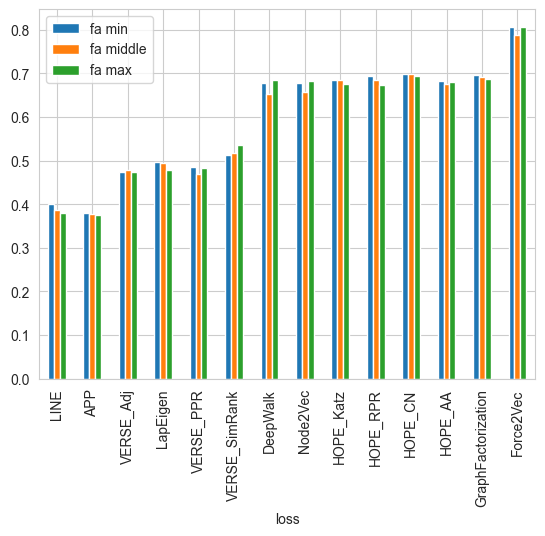

In [16]:
ax = new_df.plot.bar()

In [17]:
#cl
df_loss_cl = df[['loss', 'cl', 'acc lp']]
loss_cl_data = df_loss_cl.groupby(['cl', 'loss']).mean()  #.reset_index()
loss_cl_data = loss_cl_data.reset_index()  #= loss_conv_data.reset_index(col_level=0)
loss_cl_data
data = np.zeros((14,4))
new_df = pd.DataFrame(data,columns=['loss','cl min','cl middle','cl max'])

new_df['loss'] = loss_functions

mins=[]
middles = []
maxes = []

for loss in loss_functions:
    mins.append(loss_cl_data[(loss_cl_data['loss']==loss) & (loss_cl_data['cl']==0.0)]['acc lp'].values[0])
    middles.append(loss_cl_data[(loss_cl_data['loss']==loss) & (loss_cl_data['cl']<0.5)& (loss_cl_data['cl']>0.0)]['acc lp'].values[0])
    maxes.append(loss_cl_data[(loss_cl_data['loss']==loss) & (loss_cl_data['cl']==1.0)]['acc lp'].values[0])

new_df['cl min'] = mins
new_df['cl middle'] = middles
new_df['cl max'] = maxes
new_df=new_df.set_index('loss')
ax = new_df.plot.bar()

,cl,loss,acc lp
0,0.000000,APP,0.332260
1,0.000000,DeepWalk,0.736057
2,0.000000,Force2Vec,0.904109
3,0.000000,GraphFactorization,0.637122
4,0.000000,HOPE_AA,0.629566
5,0.000000,HOPE_CN,0.633163
6,0.000000,HOPE_Katz,0.630882
7,0.000000,HOPE_RPR,0.624934
8,0.000000,LINE,0.351317
9,0.000000,LapEigen,0.470741


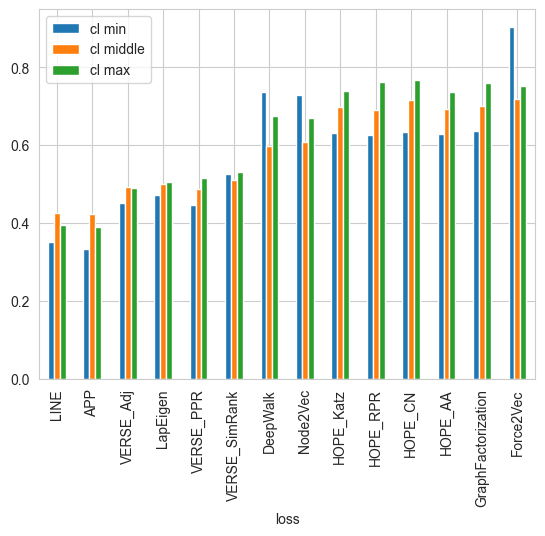

In [19]:
#asp
df_loss_asp = df[['loss', 'asp', 'acc lp']]
loss_asp_data = df_loss_asp.groupby(['asp', 'loss']).mean()  #.reset_index()
loss_asp_data = loss_asp_data.reset_index()  #= loss_conv_data.reset_index(col_level=0)
loss_asp_data
data = np.zeros((14,5))
new_df = pd.DataFrame(data,columns=['loss','asp min','asp middle1','asp middle2','asp max'])

new_df['loss'] = loss_functions

mins=[]
middles1 = []
middles2 = []
maxes = []

for loss in loss_functions:
    mins.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==0.0)]['acc lp'].values[0])
    middles1.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==0.2)]['acc lp'].values[0])
    middles2.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==0.4)]['acc lp'].values[0])
    maxes.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==1.0)]['acc lp'].values[0])

new_df['asp min'] = mins
new_df['asp middle1'] = middles1
new_df['asp middle2'] = middles2
new_df['asp max'] = maxes
new_df=new_df.set_index('loss')
ax = new_df.plot.bar()

,asp,loss,acc lp
0,0.0,APP,0.377327
1,0.0,DeepWalk,0.665122
2,0.0,Force2Vec,0.788791
3,0.0,GraphFactorization,0.694251
4,0.0,HOPE_AA,0.690338
5,0.0,HOPE_CN,0.705974
6,0.0,HOPE_Katz,0.683680
7,0.0,HOPE_RPR,0.687615
8,0.0,LINE,0.413425
9,0.0,LapEigen,0.490318


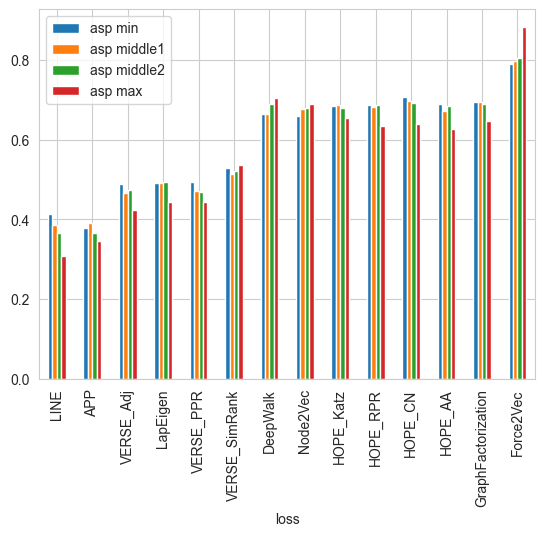

In [21]:
#ad
df_loss_ad = df[['loss', 'ad', 'acc lp']]
loss_ad_data = df_loss_ad.groupby(['ad', 'loss']).mean()  #.reset_index()
loss_ad_data = loss_ad_data.reset_index()  #= loss_conv_data.reset_index(col_level=0)
loss_ad_data
data = np.zeros((14,5))
new_df = pd.DataFrame(data,columns=['loss','ad min','ad middle1','ad middle2','ad max'])

new_df['loss'] = loss_functions

mins=[]
middles1 = []
middles2 = []
maxes = []

for loss in loss_functions:
    mins.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']==0.0)]['acc lp'].values[0])
    middles1.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']<0.1) & (loss_ad_data['ad']>0.0)]['acc lp'].values[0])
    middles2.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']<0.5)& (loss_ad_data['ad']>0.4)]['acc lp'].values[0])
    maxes.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']==1.0)]['acc lp'].values[0])

new_df['ad min'] = mins
new_df['ad middle1'] = middles1
new_df['ad middle2'] = middles2
new_df['ad max'] = maxes
new_df=new_df.set_index('loss')
ax = new_df.plot.bar()

,ad,loss,acc lp
0,0.000000,APP,0.358142
1,0.000000,DeepWalk,0.685015
2,0.000000,Force2Vec,0.833138
3,0.000000,GraphFactorization,0.669871
4,0.000000,HOPE_AA,0.654614
5,0.000000,HOPE_CN,0.678393
6,0.000000,HOPE_Katz,0.670542
7,0.000000,HOPE_RPR,0.655767
8,0.000000,LINE,0.334805
9,0.000000,LapEigen,0.486133


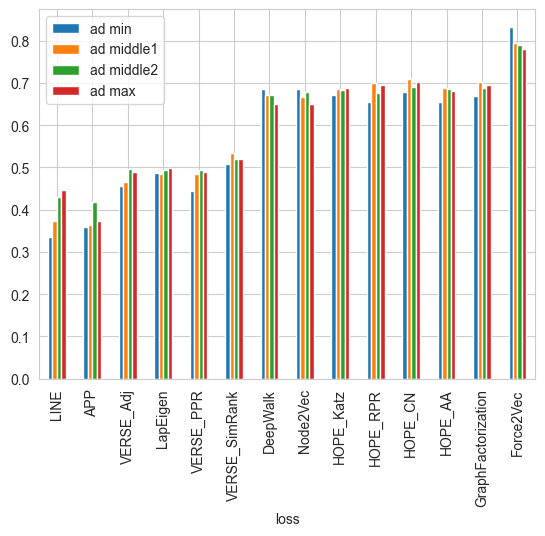

# то же самое но значения не нормализованы

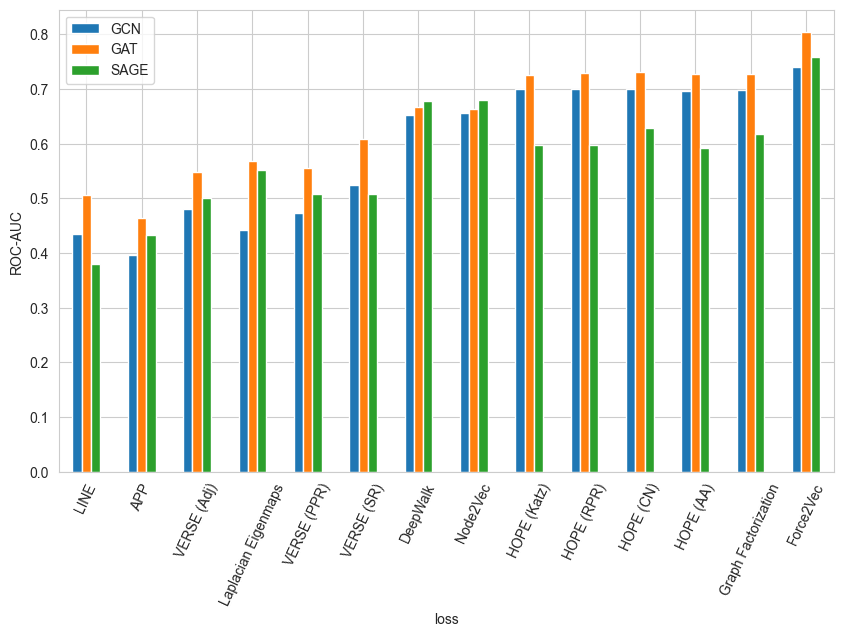

In [3]:
df_loss_conv=df[['loss','conv','acc lp']]
loss_conv_data = df_loss_conv.groupby(['conv','loss']).mean()#.reset_index()
loss_conv_data=loss_conv_data.reset_index() #= loss_conv_data.reset_index(col_level=0)
data = np.zeros((14,4))
new_df = pd.DataFrame(data,columns=['loss','GCN','GAT','SAGE'])
loss_functions = ['LINE','APP','VERSE_Adj','LapEigen','VERSE_PPR','VERSE_SimRank','DeepWalk','Node2Vec','HOPE_Katz','HOPE_RPR','HOPE_CN','HOPE_AA','GraphFactorization','Force2Vec']
new_df['loss'] = loss_functions

GCNs=[]
GATs = []
SAGEs = []

for loss in loss_functions:
    GCNs.append(loss_conv_data[(loss_conv_data['loss']==loss) & (loss_conv_data['conv']=='GCN')]['acc lp'].values[0])
    GATs.append(loss_conv_data[(loss_conv_data['loss']==loss) & (loss_conv_data['conv']=='GAT')]['acc lp'].values[0])
    SAGEs.append(loss_conv_data[(loss_conv_data['loss']==loss) & (loss_conv_data['conv']=='SAGE')]['acc lp'].values[0])

new_df['GCN'] = GCNs
new_df['GAT'] = GATs
new_df['SAGE'] = SAGEs
new_df=new_df.set_index('loss')

loss_xticks = ['LINE','APP','VERSE (Adj)','Laplacian Eigenmaps','VERSE (PPR)','VERSE (SR)','DeepWalk','Node2Vec','HOPE (Katz)','HOPE (RPR)','HOPE (CN)','HOPE (AA)','Graph Factorization','Force2Vec']
ax=new_df.plot.bar(figsize=(10,6))
plt.grid(linestyle = "-")
ax.set_xticklabels(loss_xticks, rotation=65)
plt.ylabel('ROC-AUC')
ax.set_axisbelow(True)
plt.show()

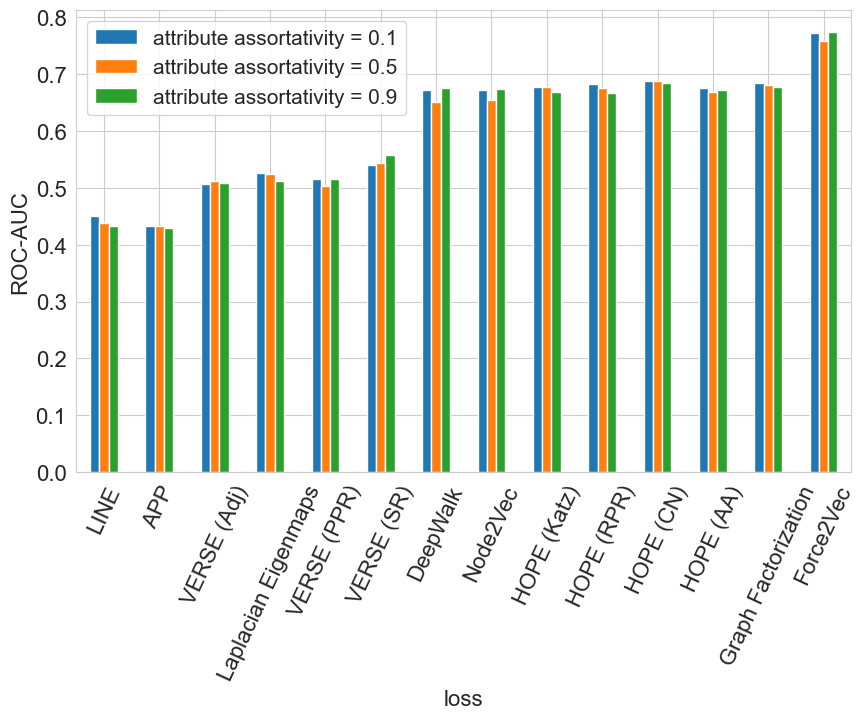

In [36]:
df_loss_fa=df[['loss','fa','acc lp']]
loss_fa_data = df_loss_fa.groupby(['fa','loss']).mean()#.reset_index()
loss_fa_data=loss_fa_data.reset_index() #= loss_conv_data.reset_index(col_level=0)
data = np.zeros((14,4))
new_df = pd.DataFrame(data,columns=['loss','attribute assortativity = 0.1','attribute assortativity = 0.5','attribute assortativity = 0.9'])

new_df['loss'] = loss_functions

mins=[]
middles = []
maxes = []

for loss in loss_functions:
    mins.append(loss_fa_data[(loss_fa_data['loss']==loss) & (loss_fa_data['fa']==0.1)]['acc lp'].values[0])
    middles.append(loss_fa_data[(loss_fa_data['loss']==loss) & (loss_fa_data['fa']==0.5)]['acc lp'].values[0])
    maxes.append(loss_fa_data[(loss_fa_data['loss']==loss) & (loss_fa_data['fa']==0.9)]['acc lp'].values[0])

new_df['attribute assortativity = 0.1'] = mins
new_df['attribute assortativity = 0.5'] = middles
new_df['attribute assortativity = 0.9'] = maxes
new_df=new_df.set_index('loss')

loss_xticks = ['LINE','APP','VERSE (Adj)','Laplacian Eigenmaps','VERSE (PPR)','VERSE (SR)','DeepWalk','Node2Vec','HOPE (Katz)','HOPE (RPR)','HOPE (CN)','HOPE (AA)','Graph Factorization','Force2Vec']

ax=new_df.plot.bar(figsize=(10,6))
plt.grid(linestyle = "-")
ax.set_xticklabels(loss_xticks, rotation=65)
plt.ylabel('ROC-AUC')
ax.set_axisbelow(True)
plt.legend( fontsize="15")

plt.show()

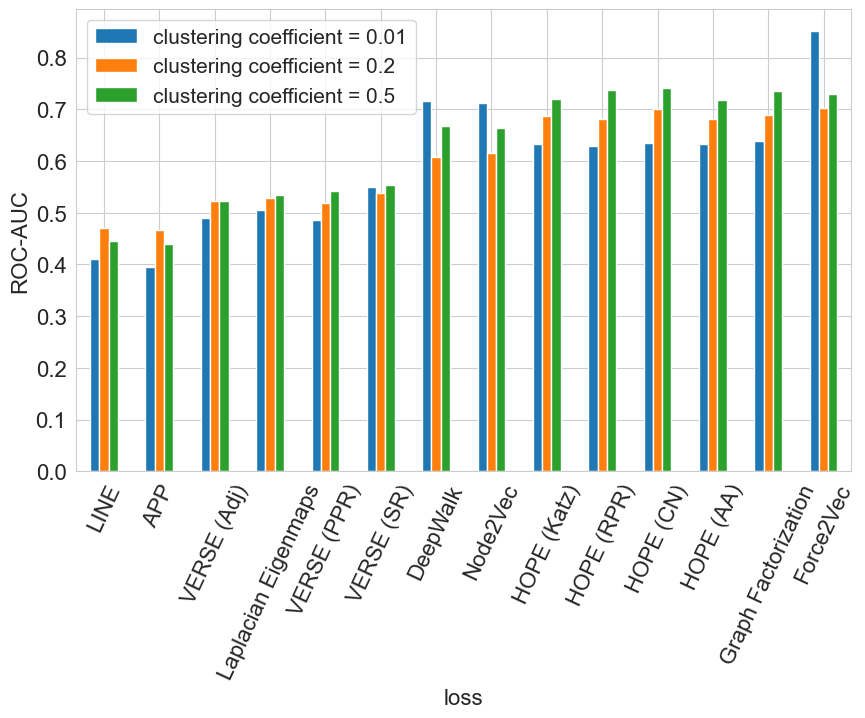

In [32]:
#cl
import matplotlib
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
df_loss_cl = df[['loss', 'cl', 'acc lp']]
loss_cl_data = df_loss_cl.groupby(['cl', 'loss']).mean()  #.reset_index()
loss_cl_data = loss_cl_data.reset_index()  #= loss_conv_data.reset_index(col_level=0)

data = np.zeros((14,4))
new_df = pd.DataFrame(data,columns=['loss','clustering coefficient = 0.01','clustering coefficient = 0.2','clustering coefficient = 0.5'])

new_df['loss'] = loss_functions

mins=[]
middles = []
maxes = []

for loss in loss_functions:
    mins.append(loss_cl_data[(loss_cl_data['loss']==loss) & (loss_cl_data['cl']==0.01)]['acc lp'].values[0])
    middles.append(loss_cl_data[(loss_cl_data['loss']==loss) & (loss_cl_data['cl']==0.2)& (loss_cl_data['cl']>0.0)]['acc lp'].values[0])
    maxes.append(loss_cl_data[(loss_cl_data['loss']==loss) & (loss_cl_data['cl']==0.5)]['acc lp'].values[0])

new_df['clustering coefficient = 0.01'] = mins
new_df['clustering coefficient = 0.2'] = middles
new_df['clustering coefficient = 0.5'] = maxes
new_df=new_df.set_index('loss')

ax=new_df.plot.bar(figsize=(10,6))
plt.grid(linestyle = "-")
ax.set_xticklabels(loss_xticks, rotation=65)
plt.ylabel('ROC-AUC')
ax.set_axisbelow(True)
plt.legend( fontsize="15")
plt.show()

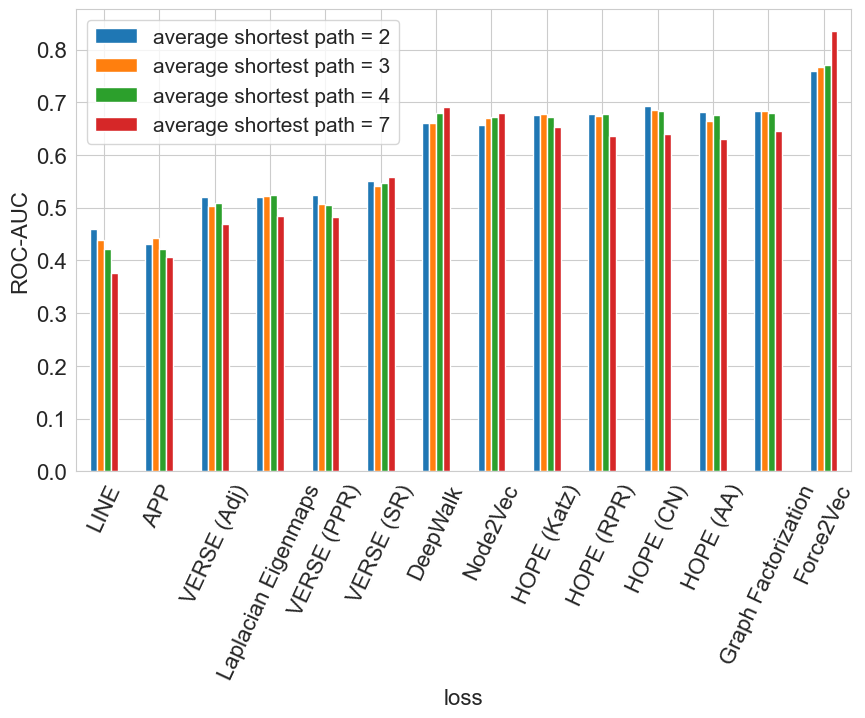

In [34]:
#asp
df_loss_asp = df[['loss', 'asp', 'acc lp']]
loss_asp_data = df_loss_asp.groupby(['asp', 'loss']).mean()  #.reset_index()
loss_asp_data = loss_asp_data.reset_index()  #= loss_conv_data.reset_index(col_level=0)

data = np.zeros((14,5))
new_df = pd.DataFrame(data,columns=['loss','average shortest path = 2','average shortest path = 3','average shortest path = 4','average shortest path = 7'])

new_df['loss'] = loss_functions

mins=[]
middles1 = []
middles2 = []
maxes = []

for loss in loss_functions:
    mins.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==2)]['acc lp'].values[0])
    middles1.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==3)]['acc lp'].values[0])
    middles2.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==4)]['acc lp'].values[0])
    maxes.append(loss_asp_data[(loss_asp_data['loss']==loss) & (loss_asp_data['asp']==7)]['acc lp'].values[0])

new_df['average shortest path = 2'] = mins
new_df['average shortest path = 3'] = middles1
new_df['average shortest path = 4'] = middles2
new_df['average shortest path = 7'] = maxes
new_df=new_df.set_index('loss')
ax=new_df.plot.bar(figsize=(10,6))
plt.grid(linestyle = "-")
ax.set_xticklabels(loss_xticks, rotation=65)
plt.ylabel('ROC-AUC')
ax.set_axisbelow(True)
plt.legend( fontsize="15")
plt.show()

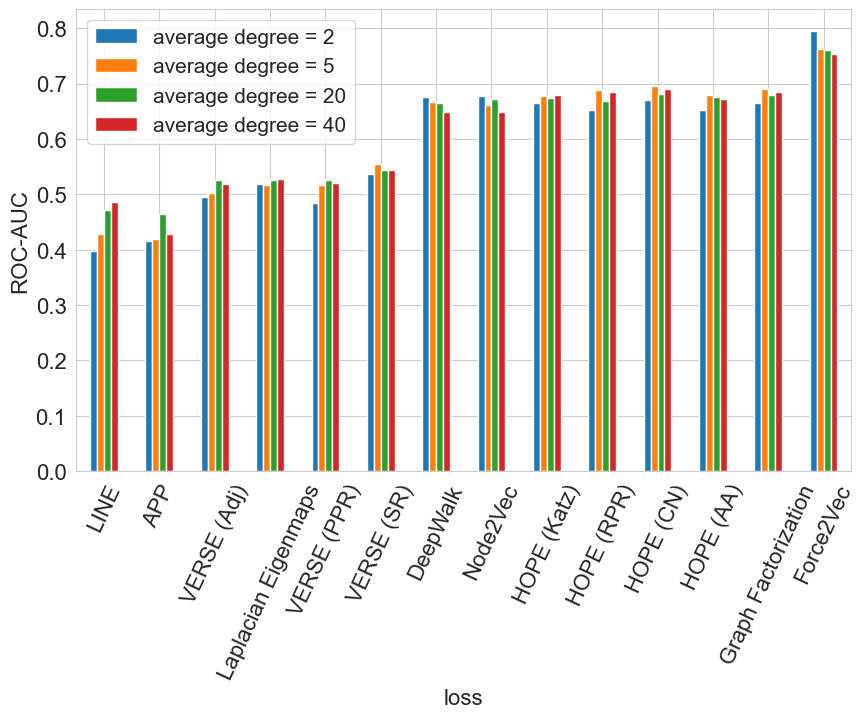

In [35]:
#ad
df_loss_ad = df[['loss', 'ad', 'acc lp']]
loss_ad_data = df_loss_ad.groupby(['ad', 'loss']).mean()  #.reset_index()
loss_ad_data = loss_ad_data.reset_index()  #= loss_conv_data.reset_index(col_level=0)

data = np.zeros((14,5))
new_df = pd.DataFrame(data,columns=['loss','average degree = 2','average degree = 5','average degree = 20','average degree = 40'])

new_df['loss'] = loss_functions

mins=[]
middles1 = []
middles2 = []
maxes = []

for loss in loss_functions:
    mins.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']==2)]['acc lp'].values[0])
    middles1.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']==5)]['acc lp'].values[0])
    middles2.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']==20)]['acc lp'].values[0])
    maxes.append(loss_ad_data[(loss_ad_data['loss']==loss) & (loss_ad_data['ad']==40)]['acc lp'].values[0])

new_df['average degree = 2'] = mins
new_df['average degree = 5'] = middles1
new_df['average degree = 20'] = middles2
new_df['average degree = 40'] = maxes
new_df=new_df.set_index('loss')
ax=new_df.plot.bar(figsize=(10,6))
plt.grid(linestyle = "-")
ax.set_xticklabels(loss_xticks, rotation=65)
plt.ylabel('ROC-AUC')
ax.set_axisbelow(True)
plt.legend( fontsize="15")
plt.show()

SS# построим heatmap'ы 2*2 характристик только для GAT, одна heatmap'а на одну ф.п.

In [17]:
import seaborn as sns


In [40]:
df[df['loss']=='Force2Vec']

,loss,conv,fa,cl,asp,ad,acc lp
413,Force2Vec,SAGE,0.1,0.01,2,5,0.881206
414,Force2Vec,SAGE,0.1,0.01,2,20,0.876049
415,Force2Vec,SAGE,0.1,0.01,2,40,0.861131
416,Force2Vec,SAGE,0.1,0.01,3,2,0.865220
417,Force2Vec,SAGE,0.1,0.01,3,5,0.877861
...,...,...,...,...,...,...,...
615,Force2Vec,GAT,0.9,0.50,2,20,0.741969
616,Force2Vec,GAT,0.9,0.50,2,40,0.765572
617,Force2Vec,GAT,0.9,0.50,3,5,0.706426
618,Force2Vec,GAT,0.9,0.50,3,20,0.701424


In [197]:
loss_mapping = {'LINE':'LINE', 'APP':'APP', 'VERSE_Adj': 'VERSE (Adj)', 'LapEigen': 'Laplacian Eigenmaps', 'VERSE_PPR': 'VERSE (PPR)', 'VERSE_SimRank': 'VERSE (SR)', 'DeepWalk':'DeepWalk', 'Node2Vec':'Node2Vec', 'HOPE_Katz': 'HOPE (Katz)', 'HOPE_RPR': 'HOPE (RPR)', 'HOPE_CN' : 'HOPE (CN)', 'HOPE_AA': 'HOPE (AA)', 'GraphFactorization':'Graph Factorization', 'Force2Vec': 'Force2Vec'}

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2121693401.py:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2121693401.py:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2121693401.py:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2121693401.py:18: FutureWarning:


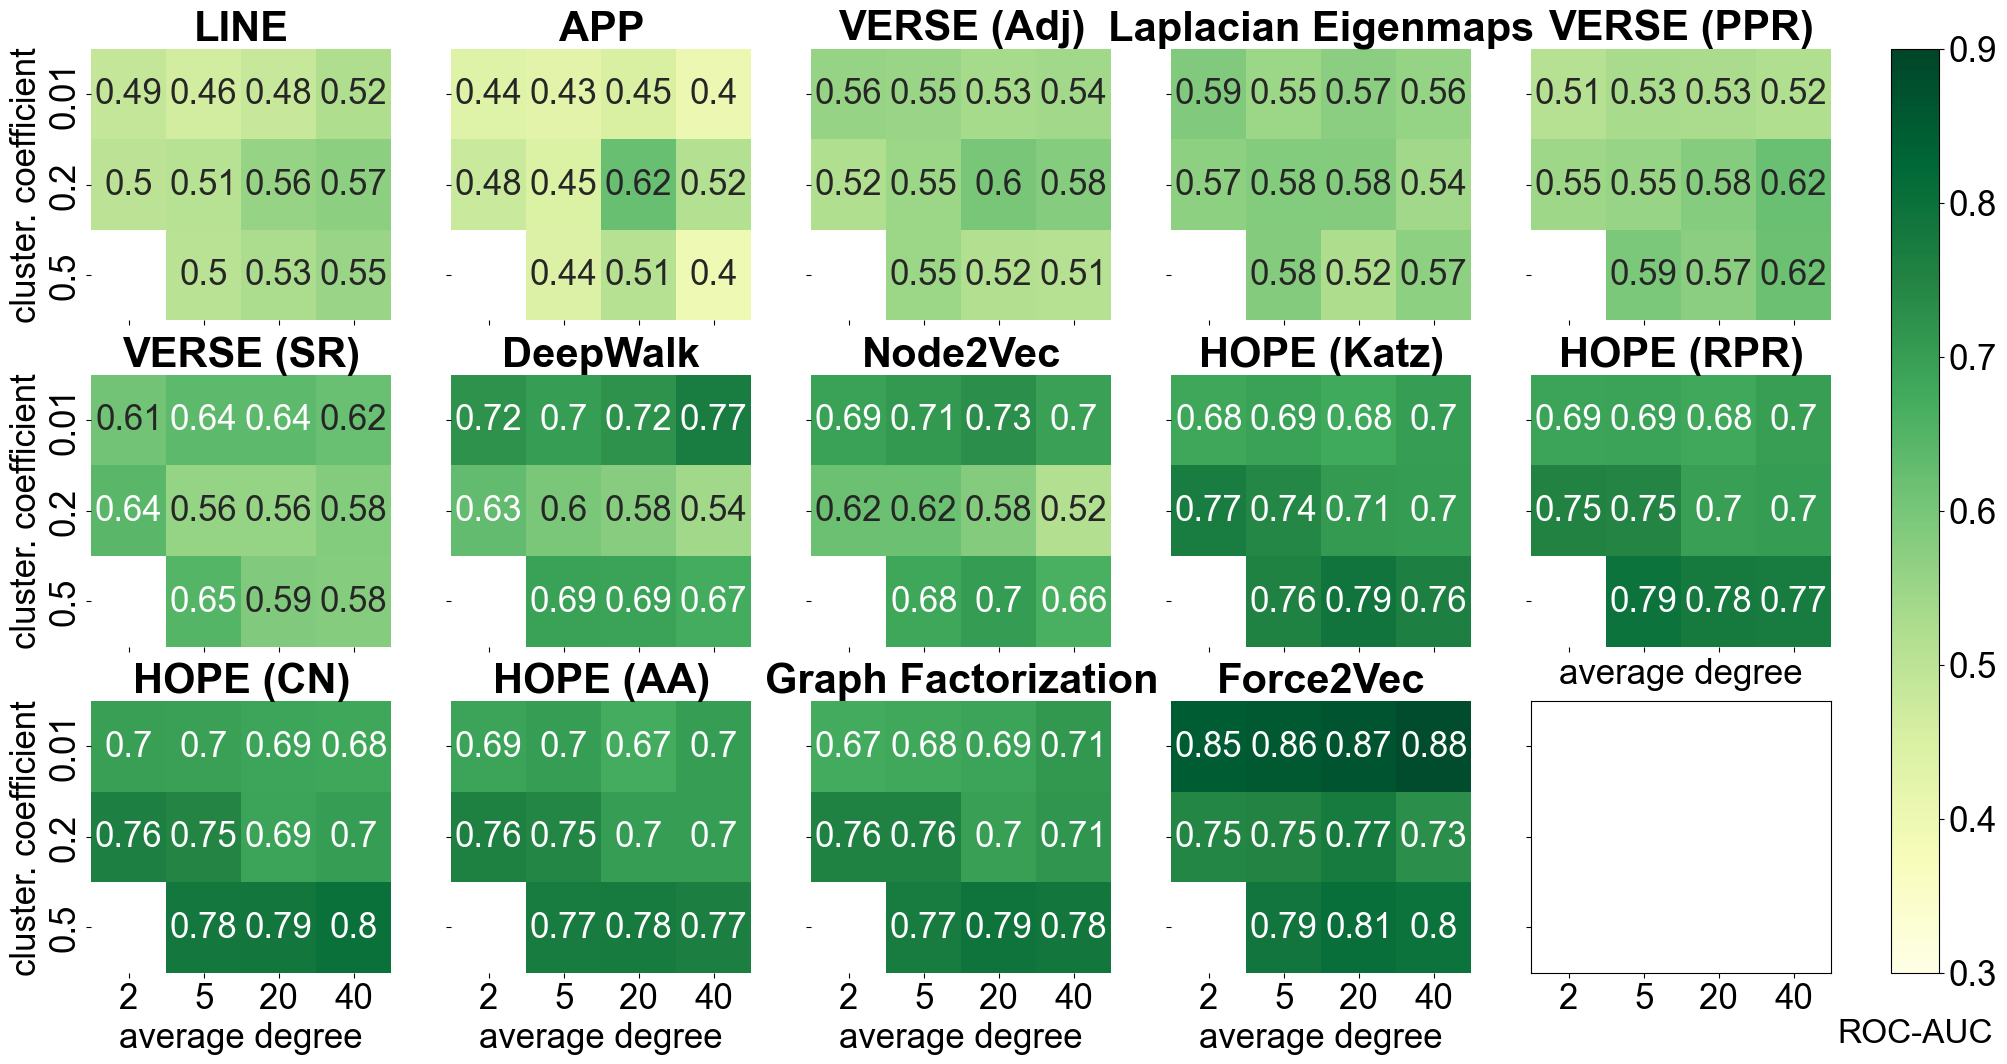

In [217]:
fig, ax = plt.subplots(3, 5,figsize=(24, 12),sharex=True,sharey=True)

#plt.rcParams['font.size'] = 18
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 25}
matplotlib.rc('font', **font)

row = 0
col = 0
vmin = 0.3
vmax = 0.9

for i, loss in enumerate(loss_functions):
    x_label = ''
    y_label = ''
    df_app = df[(df['loss']==loss) & (df['conv']=='GAT')]
    df_app=df_app.groupby(['ad','cl']).mean()['acc lp']
    df_app=df_app.unstack(level=[0])
    row = int(i/5)
    col = i%5
    if col==0:
        y_label='cluster. coefficient'
    if row == 2:
        x_label='average degree'
    if col==4 and row==1:
        x_label='average degree'
    sns.heatmap(df_app, ax = ax[row,col],annot=True,cbar = False,vmin=vmin,vmax=vmax,cmap='YlGn').set(xlabel=x_label, ylabel=y_label)
    ax[row,col].set_title(loss_mapping[loss],weight='bold')

# Adjust the subplots layout to make room for the colorbar
fig.subplots_adjust(right=0.85)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.875, 0.11, 0.02, 0.77])

# Add the colorbar using the first heatmap as a reference
colorbar = fig.colorbar(ax[0,0].collections[0], cax=cbar_ax)
#colorbar_text = fig.text(0.5, 0.98, 'ROC-AUC', ha='center', va='top', fontsize=12)
#colorbar.set_label('ROC-AUC', fontsize=20, loc='top')
# Add a label above the colorbar
colorbar.ax.text(0.5, 0.25, 'ROC-AUC', ha='center', va='bottom', fontsize=24)

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20216\4124530751.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\4124530751.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\4124530751.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\4124530751.py:19: FutureWarning:


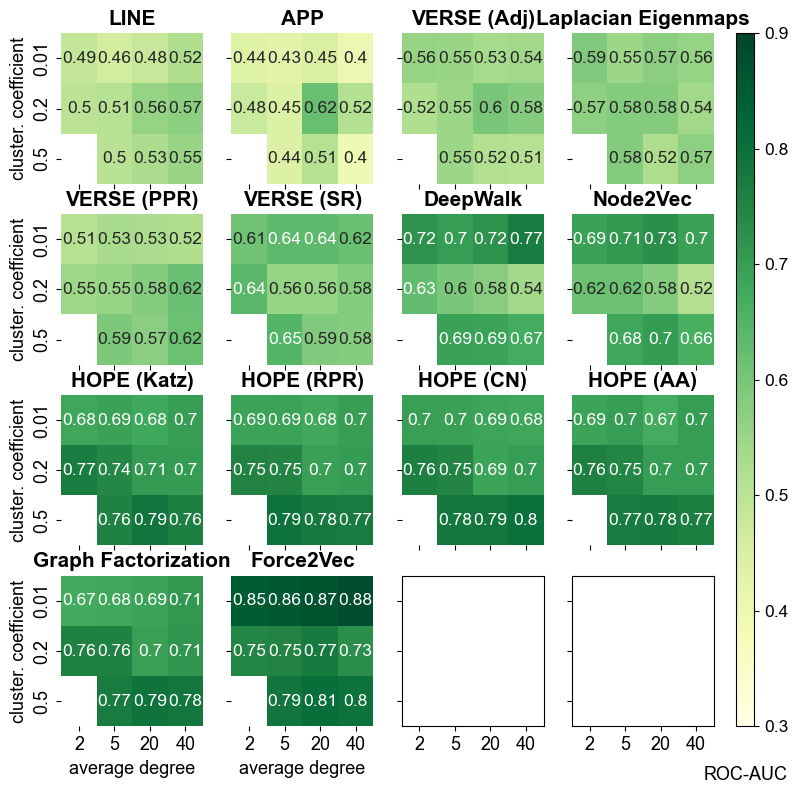

In [223]:
fig, ax = plt.subplots(4, 4,figsize=(9, 9),sharex=True,sharey=True)

#plt.rcParams['font.size'] = 18
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12.5}
matplotlib.rc('font', **font)


row = 0
col = 0
vmin = 0.3
vmax = 0.9

for i, loss in enumerate(loss_functions):
    x_label=''
    y_label = ''
    df_app = df[(df['loss']==loss) & (df['conv']=='GAT')]
    df_app=df_app.groupby(['ad','cl']).mean()['acc lp']
    df_app=df_app.unstack(level=[0])
    row = int(i/4)
    col = i%4
    if col==0:
        y_label='cluster. coefficient'
    if row == 3:
        x_label='average degree'
    if (col ==2) and (row == 3):
        x_label='average degree'
    if (col ==3) and (row == 3):
        x_label='average degree'
    sns.heatmap(df_app, ax = ax[row,col],annot=True,cbar = False,vmin=vmin,vmax=vmax,cmap='YlGn').set(xlabel=x_label, ylabel=y_label)
    ax[row,col].set_title(loss_mapping[loss],weight='bold')

# Adjust the subplots layout to make room for the colorbar
fig.subplots_adjust(right=0.85)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.875, 0.11, 0.02, 0.77])

# Add the colorbar using the first heatmap as a reference
colorbar = fig.colorbar(ax[0,0].collections[0], cax=cbar_ax)
#colorbar_text = fig.text(0.5, 0.98, 'ROC-AUC', ha='center', va='top', fontsize=12)
#colorbar.set_label('ROC-AUC', fontsize=20, loc='top')
# Add a label above the colorbar
colorbar.ax.text(0.5, 0.25, 'ROC-AUC', ha='center', va='bottom', fontsize=13)

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20216\339993855.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\339993855.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\339993855.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\339993855.py:19: FutureWarning:

The

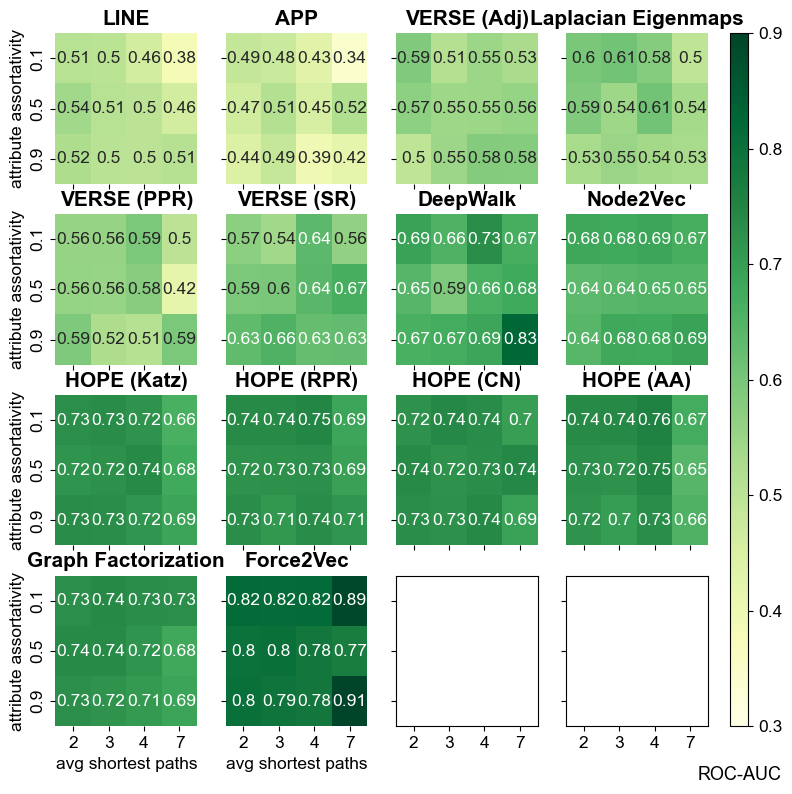

In [226]:
fig, ax = plt.subplots(4, 4,figsize=(9, 9),sharex=True,sharey=True)

#plt.rcParams['font.size'] = 18
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12.5}
matplotlib.rc('font', **font)


row = 0
col = 0
vmin = 0.3
vmax = 0.9

for i, loss in enumerate(loss_functions):
    x_label=''
    y_label = ''
    df_app = df[(df['loss']==loss) & (df['conv']=='GAT')]
    df_app=df_app.groupby(['asp','fa']).mean()['acc lp']
    df_app=df_app.unstack(level=[0])
    row = int(i/4)
    col = i%4
    if col==0:
        y_label='attribute assortativity'
    if row == 3:
        x_label='avg shortest paths'
    if (col ==2) & (row == 3):
        x_label='avg shortest paths'
    if (col ==3) & (row == 3):
        x_label='avg shortest paths'
    sns.heatmap(df_app, ax = ax[row,col],annot=True,cbar = False,vmin=vmin,vmax=vmax,cmap='YlGn').set(xlabel=x_label, ylabel=y_label)
    ax[row,col].set_title(loss_mapping[loss],weight='bold')

# Adjust the subplots layout to make room for the colorbar
fig.subplots_adjust(right=0.85)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.875, 0.11, 0.02, 0.77])

# Add the colorbar using the first heatmap as a reference
colorbar = fig.colorbar(ax[0,0].collections[0], cax=cbar_ax)
#colorbar_text = fig.text(0.5, 0.98, 'ROC-AUC', ha='center', va='top', fontsize=12)
#colorbar.set_label('ROC-AUC', fontsize=20, loc='top')
# Add a label above the colorbar
colorbar.ax.text(0.5, 0.25, 'ROC-AUC', ha='center', va='bottom', fontsize=13)

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20216\1896190501.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\1896190501.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\1896190501.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\1896190501.py:14: FutureWarning:


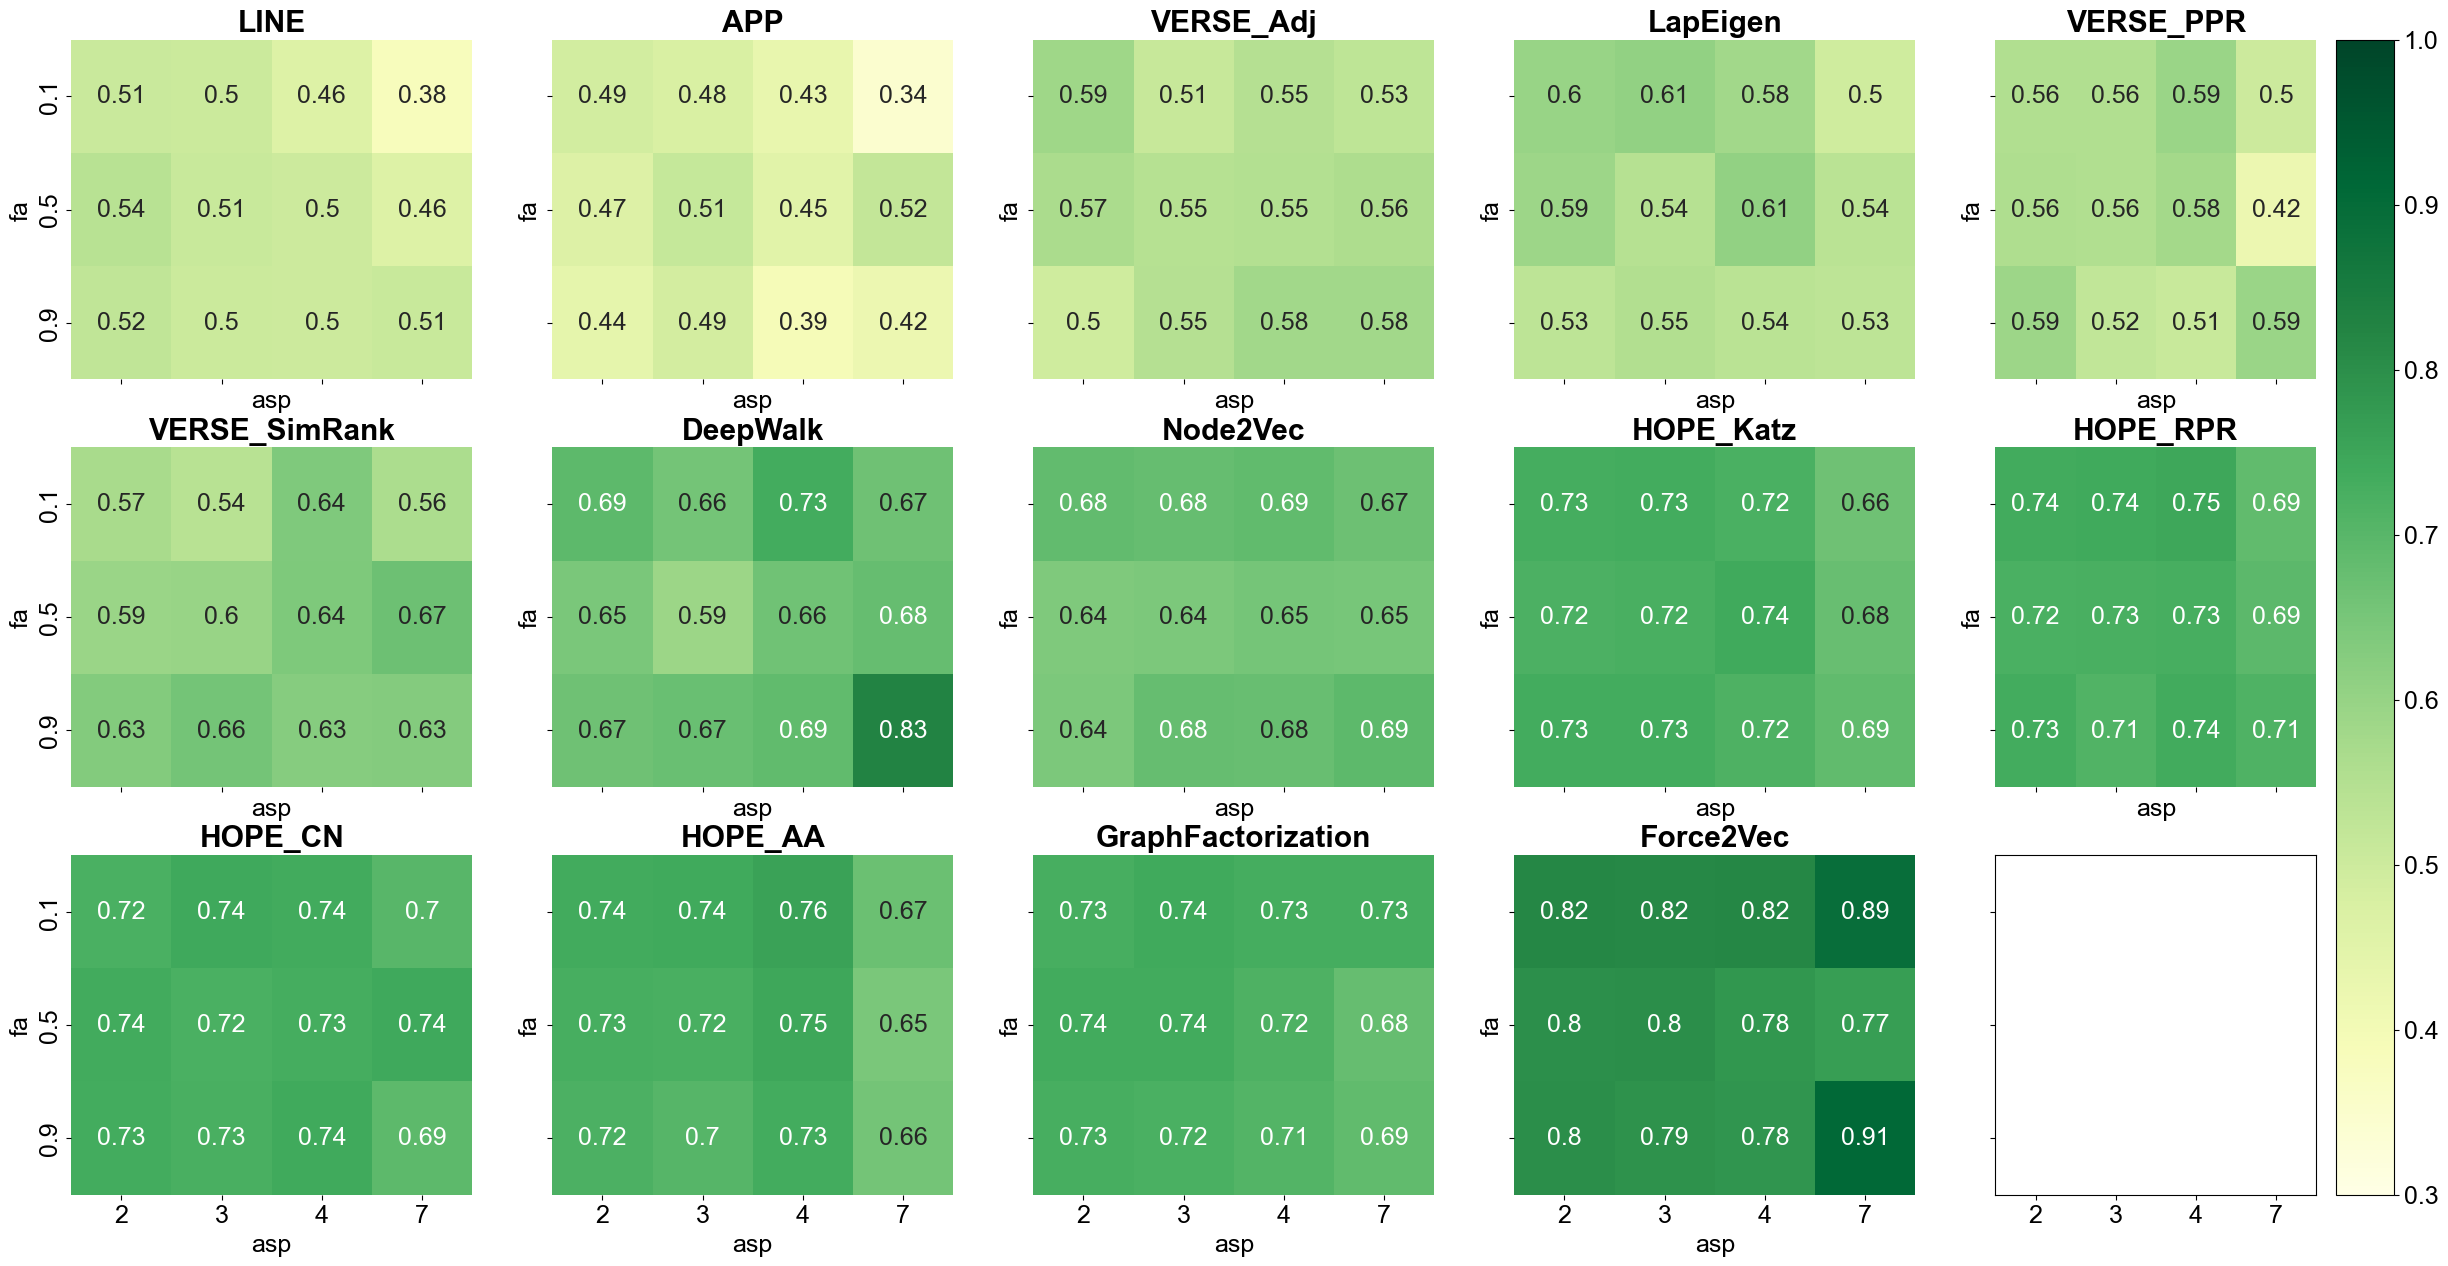

In [118]:
import matplotlib

fig, ax = plt.subplots(3, 5,figsize=(30, 15),sharex=True,sharey=True)

plt.rcParams['font.size'] = 18


row = 0
col = 0
vmin = 0.3
vmax = 1
for i, loss in enumerate(loss_functions):
    df_app = df[(df['loss']==loss) & (df['conv']=='GAT')]
    df_app=df_app.groupby(['asp','fa']).mean()['acc lp']
    df_app=df_app.unstack(level=[0])
   # ax = plt.axes()
    row = int(i/5)
    col = i%5
    sns.heatmap(df_app, ax = ax[row,col],annot=True,cbar = False,vmin=vmin,vmax=vmax,cmap='YlGn')
    ax[row,col].set_title(loss,weight='bold')

fig.colorbar( ax[0,0].collections[0], ax = ax[:,4])

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2873942876.py:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2873942876.py:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2873942876.py:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\2873942876.py:17: FutureWarning:


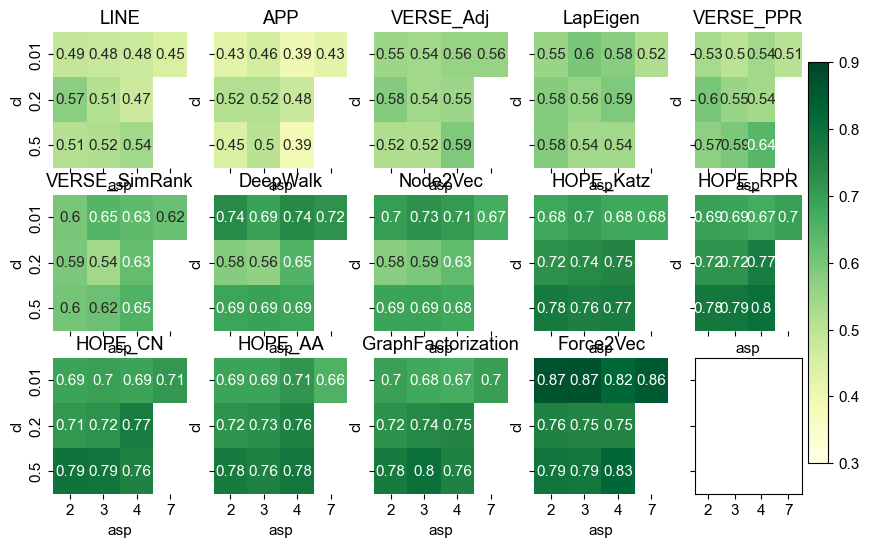

In [113]:
import matplotlib
import seaborn as sns
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 11}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(3, 5,figsize=(10, 6),sharex=True,sharey=True)

#plt.rcParams['font.size'] = 18
row = 0
col = 0
vmin = 0.3
vmax = 0.9
for i, loss in enumerate(loss_functions):
    df_app = df[(df['loss']==loss) & (df['conv']=='GAT')]
    df_app=df_app.groupby(['asp','cl']).mean()['acc lp']
    df_app=df_app.unstack(level=[0])
   # ax = plt.axes()
    row = int(i/5)
    col = i%5
    sns.heatmap(df_app, ax = ax[row,col],annot=True,cbar = False,vmin=vmin,vmax=vmax,cmap='YlGn')
    ax[row,col].set_title(loss)

fig.colorbar( ax[0,0].collections[0], ax = ax[:,4])

C:\Users\user\AppData\Local\Temp\ipykernel_20216\3511871031.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\3511871031.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\3511871031.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\user\AppData\Local\Temp\ipykernel_20216\3511871031.py:14: FutureWarning:


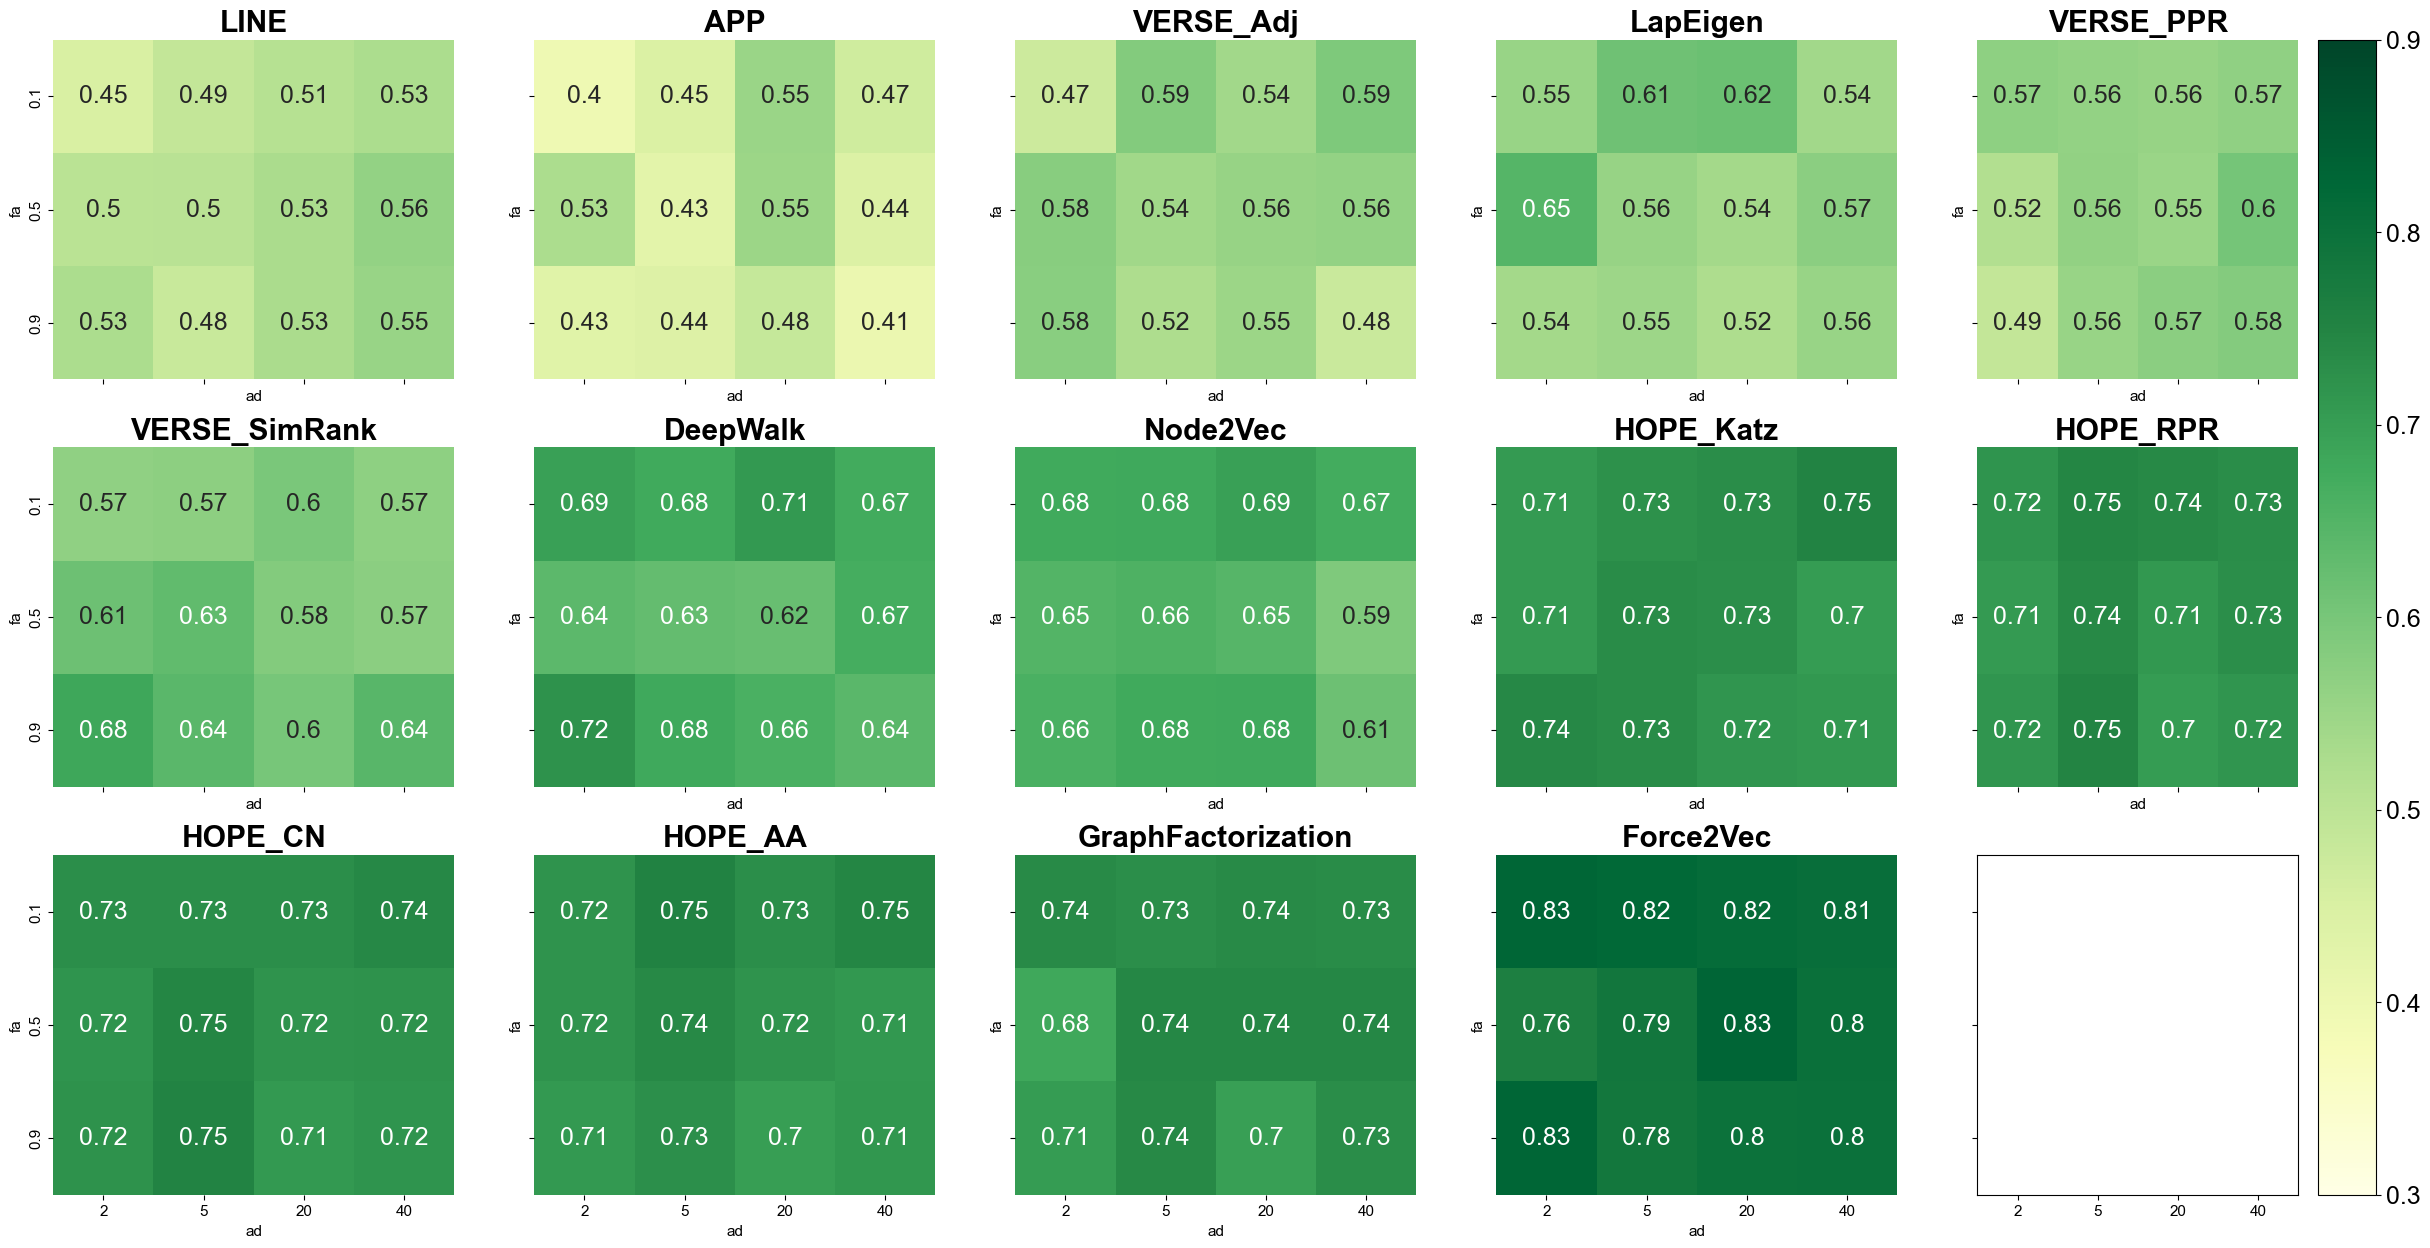

In [114]:
import matplotlib

fig, ax = plt.subplots(3, 5,figsize=(30, 15),sharex=True,sharey=True)

plt.rcParams['font.size'] = 18


row = 0
col = 0
vmin = 0.3
vmax = 0.9
for i, loss in enumerate(loss_functions):
    df_app = df[(df['loss']==loss) & (df['conv']=='GAT')]
    df_app=df_app.groupby(['ad','fa']).mean()['acc lp']
    df_app=df_app.unstack(level=[0])
   # ax = plt.axes()
    row = int(i/5)
    col = i%5
    sns.heatmap(df_app, ax = ax[row,col],annot=True,cbar = False,vmin=vmin,vmax=vmax,cmap='YlGn')
    ax[row,col].set_title(loss,weight='bold')

fig.colorbar( ax[0,0].collections[0], ax = ax[:,4])

# взаимовлияние характеристик

In [3]:
df_GAT = df[df['conv'] == 'GAT'].drop(columns=['conv'])

In [4]:
df_GAT=df_GAT.reset_index().drop(columns=['index'])

In [5]:
df_GAT['acc lp']=pd.cut(df_GAT['acc lp'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [6]:
df_GAT=df_GAT.sort_values(by=['acc lp'])

In [36]:
#font = {'family' : 'arial',
  #      'weight' : 'normal',
 #       'size'   : 16}

#matplotlib.rc('font', **font)
import plotly.express as px
fig = px.parallel_categories(df_GAT,dimensions=['fa', 'cl','asp','ad'], color="acc lp",labels={'acc lp':'ROC-AUC','fa':'attribute assortativity','cl':'clustering coefficient', 'asp':'avg. shortest paths', 'ad':'average degree'},color_continuous_scale="aggrnyl", width=1300,height=700)
fig.update_layout(
    font={'size' : 25, 'family':'arial'}
)


# Customize the colorbar label
fig.update_layout(
    coloraxis_colorbar=dict(
        title='ROC-AUC',
        title_font=dict(size=30, family='Arial')
    )
)

fig.show()
#fig.write_image('parallel_plot.png')

# ниже попытки сделать закругления

In [ ]:


import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type'];

dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=cars_df.horsepower, y=cars_df['highway-mpg'],
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

In [132]:
import plotly.graph_objects as go
colorscale = [[0, 'gray'], [1, 'firebrick']]
color = np.zeros(963, dtype='uint8')

In [136]:
fig = go.Figure(go.Parcats(df_GAT,dimensions=['acc lp', 'fa', 'cl','asp','ad'], color="acc lp",color_continuous_scale=px.colors.sequential.Inferno, width=1400,height=800,
    counts=[6, 10, 40, 23, 7],line={ 'shape': 'hspline'}
))

fig.show()

ValueError: The first argument to the plotly.graph_objs.Parcats
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Parcats`